In [140]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework
Fork and clone this repo. At the end of this lab, you'll submit a pull request using the `Titanic.ipynb` notebook to answer the questions below.

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.

In [45]:
df = pd.read_csv('train.csv')

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

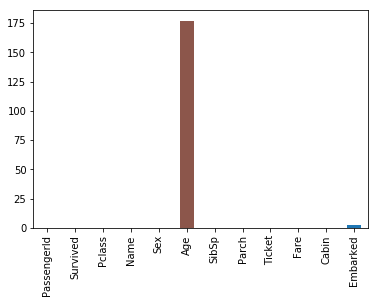

In [12]:
df_temp =df.isnull().sum()
df_temp.plot.bar()

Cabin has the most NaN values at 687.  

In [7]:
df['Embarked'] = df['Embarked'].dropna

In [11]:
#df['Cabin'] = df['Cabin'].replace('NaN',' ¯\(ツ)/¯')

df['Cabin'].fillna(' ¯\(ツ)/¯',inplace = True)

In [40]:
df['Age'].fillna(' empty',inplace = True)

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [9]:
df_split = pd.get_dummies(df)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [13]:
for each in df['Survived'].value_counts():
    t= each/890
    print(t)

0.6168539325842697
0.3842696629213483


In [14]:
df.groupby(["Sex","Survived"]).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [15]:
df.groupby(["Pclass","Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [30]:
titanic = df.drop(['Age', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [32]:
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,S,Mr
5,6,0,3,"Moran, Mr. James",male,0,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,C,Mrs


In [35]:
titanic.groupby(["Title","Survived"]).size()

Title         Survived
Capt          0             1
Col           0             1
              1             1
Don           0             1
Dr            0             4
              1             3
Jonkheer      0             1
Lady          1             1
Major         0             1
              1             1
Master        0            17
              1            23
Miss          0            55
              1           127
Mlle          1             2
Mme           1             1
Mr            0           436
              1            81
Mrs           0            26
              1            99
Ms            1             1
Rev           0             6
Sir           1             1
the Countess  1             1
dtype: int64

In [38]:
df.groupby(['Cabin','Survived']).size()

Cabin     Survived
 ¯\(ツ)/¯  0           481
          1           206
A10       0             1
A14       0             1
A16       1             1
A19       0             1
A20       1             1
A23       1             1
A24       0             1
A26       1             1
A31       1             1
A32       0             1
A34       1             1
A36       0             1
A5        0             1
A6        1             1
A7        0             1
B101      1             1
B102      0             1
B18       1             2
B19       0             1
B20       1             2
B22       0             1
          1             1
B28       1             2
B3        1             1
B30       0             1
B35       1             2
B37       0             1
B38       0             1
                     ... 
E25       1             2
E31       0             1
E33       1             2
E34       1             1
E36       1             1
E38       0             1
E40       1        

In [93]:
df.groupby(['Age','Survived']).size()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   0           2
       1           5
2.00   0           7
       1           3
3.00   0           1
       1           5
4.00   0           3
       1           7
5.00   1           4
6.00   0           1
       1           2
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           2
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           3
14.50  0           1
                  ..
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
55.50  0           1
56.00  0           2
       1           2
57.00  0           2
58.00  0           2
       1           3
59.00  0          

In [42]:
df.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [50]:
age_temp = df.query('Age < 12')
age_temp.groupby(['Pclass','Survived']).size()

Pclass  Survived
1       0            1
        1            3
2       1           17
3       0           28
        1           19
dtype: int64

In [54]:
ticket_temp = df.query('Survived == 0')
ticket_temp['Fare'].sort_values(ascending= False)

27     263.0000
438    263.0000
118    247.5208
557    227.5250
527    221.7792
377    211.5000
332    153.4625
498    151.5500
297    151.5500
373    135.6333
659    113.2750
698    110.8833
505    108.9000
544    106.4250
245     90.0000
62      83.4750
34      82.1708
262     79.6500
139     79.2000
789     79.2000
741     78.8500
102     77.2875
124     77.2875
120     73.5000
665     73.5000
655     73.5000
72      73.5000
385     73.5000
745     71.0000
846     69.5500
         ...   
131      7.0500
465      7.0500
784      7.0500
477      7.0458
129      6.9750
825      6.9500
411      6.8583
654      6.7500
143      6.7500
371      6.4958
202      6.4958
818      6.4500
843      6.4375
326      6.2375
872      5.0000
378      4.0125
413      0.0000
822      0.0000
674      0.0000
633      0.0000
481      0.0000
815      0.0000
302      0.0000
806      0.0000
466      0.0000
732      0.0000
597      0.0000
263      0.0000
277      0.0000
179      0.0000
Name: Fare, Length: 549,

In [58]:
titanic['Last'] = df.Name.apply(lambda name: name.split(',')[0].split('.')[0].strip())
titanic

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Embarked,Title,Last
0,1,0,3,"Braund, Mr. Owen Harris",male,1,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,0,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,0,S,Mr,Allen
5,6,0,3,"Moran, Mr. James",male,0,Q,Mr,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,S,Mr,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,S,Master,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,S,Mrs,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,C,Mrs,Nasser


In [124]:
family = titanic.query('SibSp > 1')
family_count = family['Survived'].value_counts()

family_count[0]/(family_count[0]+family_count[1])

0.7297297297297297

In [125]:
no_family = titanic.query('SibSp < 1')
no_family_count = no_family['Survived'].value_counts()

(no_family_count[0]/(no_family_count[0]+no_family_count[1]))*100

65.46052631578947

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

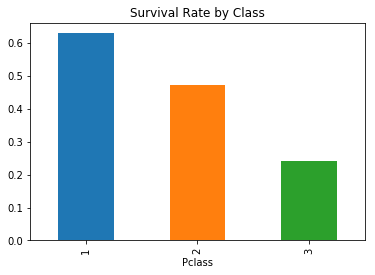

In [156]:
class_survival_plot = df.groupby('Pclass')['Survived'].mean()
plt1 = class_survival_plot.plot.bar(title='Survival Rate by Class')
plt1

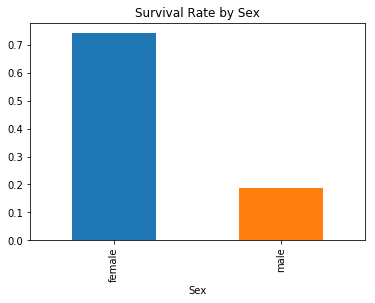

In [166]:
sex_survival_plot = df.groupby('Sex')['Survived'].mean()
plt2 = sex_survival_plot.plot.bar(title='Survival Rate by Sex', sharey = True)
plt2

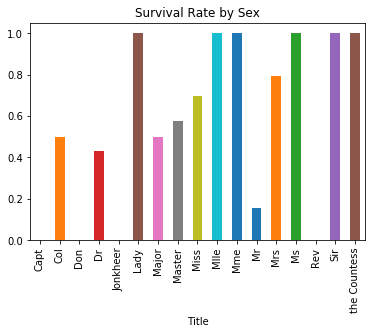

In [165]:
title_survival_plot = titanic.groupby('Title')['Survived'].mean()
plt3 = title_survival_plot.plot.bar(title='Survival Rate by Sex', sharey = True)
plt3

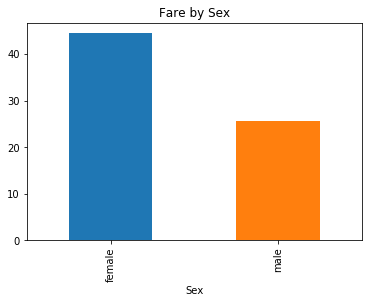

In [170]:
title_survival_plot = df.groupby('Sex')['Fare'].mean()
plt4 = title_survival_plot.plot.bar(title='Fare by Sex', sharey = True)
plt4